In [ ]:
!pip install pykrx
from pykrx import stock

In [3]:
import datetime as dt

end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365*3)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20200831 20230831


In [75]:
import pandas as pd
import numpy as np

tmp = pd.DataFrame()
ticker = "352820"  # "하이브" 종목의 코드
tmp['close'] = stock.get_market_ohlcv(start, end, ticker)['종가']
tmp

,close
날짜,
2020-10-15,255420
2020-10-16,198495
2020-10-19,187110
2020-10-20,180675
2020-10-21,177210
...,...
2023-08-25,237000
2023-08-28,244500
2023-08-29,251000


# 몬테카를로 시뮬레이션

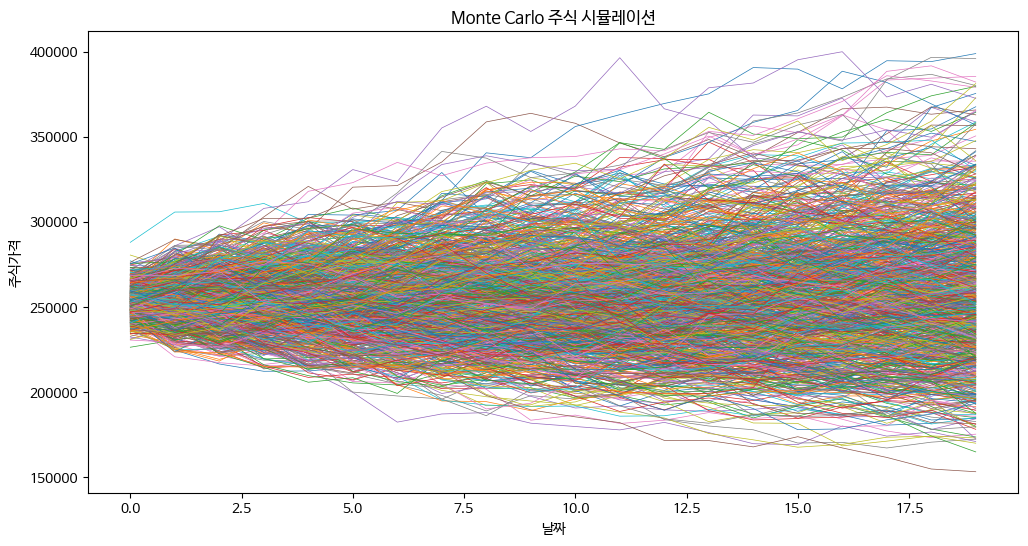

In [140]:
np.random.seed(42) # 시드고정
num_simulations = 1000 # 반복횟수
num_days = 20 # 단기 예측

# 초기 가격 설정
initial_price = tmp['close'][-1]

# 일일 수익률
daily_returns = tmp['close'].pct_change().dropna()

# 연간 수익률
mean_return = daily_returns.mean()
annual_return = ((1 + mean_return) ** num_days) - 1

# 변동성 계산
volatility = daily_returns.std() * np.sqrt(num_days)

# 로그 수익률 시뮬레이션 생성
log_returns = np.random.normal(
    (annual_return / num_days),
    (volatility / np.sqrt(num_days)),
    (num_days, num_simulations))

# 로그 수익률을 이용해 주식 가격 시뮬레이션 생성
price_simulations = initial_price * np.exp(np.cumsum(log_returns, axis=0))
price_simulations_df = pd.DataFrame(price_simulations)

# 시뮬레이션 결과 시각화
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(price_simulations_df.index, price_simulations_df.iloc[:, i], lw=0.5)

plt.title('Monte Carlo 주식 시뮬레이션')
plt.xlabel('날짜')
plt.ylabel('주식가격')
plt.show()

In [141]:
price_simulations_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,256942.183340,251461.882302,258262.674508,266053.654302,250644.514124,250644.653843,266561.663252,259314.853812,248649.856788,257342.457093,...,254439.036097,235724.116937,250533.701290,246862.197859,244197.557037,250245.303185,268546.349599,258202.652462,247792.695766,257604.919035
1,269599.809657,259630.789533,258934.866518,260422.941078,256805.097239,254161.804635,274946.122378,265120.363826,257818.616175,252853.273242,...,261598.947504,241978.187694,261004.018984,253016.400238,247271.056266,259654.420708,268458.877827,250730.039856,246566.202080,251315.676748
2,263641.120883,258508.452681,252205.923872,257862.211013,240951.936773,256156.310695,275115.442482,258014.478633,263806.172904,261182.076268,...,275578.916517,247118.075642,261793.601388,251344.323274,239544.445092,260488.062074,270974.313398,240516.704127,249523.141099,250138.049564
3,247246.781030,251210.217695,248831.835743,275088.673574,245689.627075,244941.258795,279854.015504,244950.019180,273841.751287,257185.136924,...,260367.799426,243335.212307,244950.611078,257984.858017,223452.106088,260889.768530,252661.329475,238051.980458,263993.542331,253365.445534
4,240241.128472,251088.472087,249127.236135,279699.443707,234682.676063,250062.979502,255448.167584,239904.799727,269494.112629,262926.496020,...,242594.100625,249189.193191,244137.938451,263148.741473,218645.518209,260606.122112,258987.420127,264742.496151,271492.611651,246315.417135
5,236945.403804,247394.719790,234526.896822,276741.162701,240733.625593,239612.493012,264857.986022,244051.312297,263009.864704,261816.482266,...,247206.358234,251939.780886,236137.010991,267979.081943,225280.480922,262278.478194,269479.014377,254168.480828,275999.248500,236856.057317
6,228281.065937,242290.539521,227274.570289,271795.794759,239126.957623,246662.734218,262136.156706,231392.599146,273547.539675,254626.169128,...,252336.965139,260457.497943,243984.089966,278087.760040,220633.194463,259788.530005,276767.129842,249801.204115,276110.035601,240222.769348
7,234583.599714,228230.021380,232991.413404,269802.447346,245081.281635,253401.740301,277004.275068,242413.486646,286509.249175,267571.999700,...,263064.054597,260392.418155,258094.553913,286959.735593,215520.558500,280191.912674,280017.962017,242957.083089,292216.857487,257930.202616
8,234455.409178,224489.303363,231764.923180,276588.901925,256095.955889,258506.497485,278122.453961,255208.839715,283645.060248,277263.027062,...,277920.243299,268552.257193,256890.476751,269980.342196,215503.056473,281322.069253,291505.673465,256567.734734,285663.132545,265195.308770
9,240766.631601,232955.809680,235858.140064,259084.071903,254894.515027,248701.987343,276374.562167,263995.319159,286763.916505,288450.330695,...,291950.809558,270459.032053,262882.567907,256733.888359,224549.784851,294197.618155,272539.505964,250640.468234,290679.386209,271217.330269


## 샤프지수

In [142]:
df = pd.DataFrame()

# 일일 수익률
daily_returns = price_simulations_df.pct_change()

# 연간 주식 수익률 --> 주식별 가중치 고려
df['annual_returns'] = ((1 + daily_returns.mean()) ** num_days) - 1

# 연간 리스크
df['annual_risk'] = daily_returns.std() * np.sqrt(num_days)

In [143]:
# 무위험 이자율을 설정
rf = 0.035 # 금리 or 정기 예금 or 정부 채권의 연간 수익률

# 샤프 지수 계산
df['SharpeRatio'] = (df['annual_returns'] - rf) / df['annual_risk']

# 샤프 지수의 중앙값 포트폴리오의 정보를 가져옵니다.
median_value = np.sort(df['SharpeRatio'])[num_simulations // 2]
med_sharpe_portfolio = df[df['SharpeRatio'] == median_value]

# 샤프 지수, 연간 수익률, 연간 리스크를 출력합니다.
print(f"포트폴리오의 샤프 지수: {med_sharpe_portfolio['SharpeRatio'].values[0]*100:.2f}%")
print(f"포트폴리오의 월간 수익률: {med_sharpe_portfolio['annual_returns'].values[0]*100:.2f}%")
print(f"포트폴리오의 월간 리스크: {med_sharpe_portfolio['annual_risk'].values[0]*100:.2f}%")

포트폴리오의 샤프 지수: -4.76%
포트폴리오의 월간 수익률: 2.88%
포트폴리오의 월간 리스크: 13.07%


## 확률

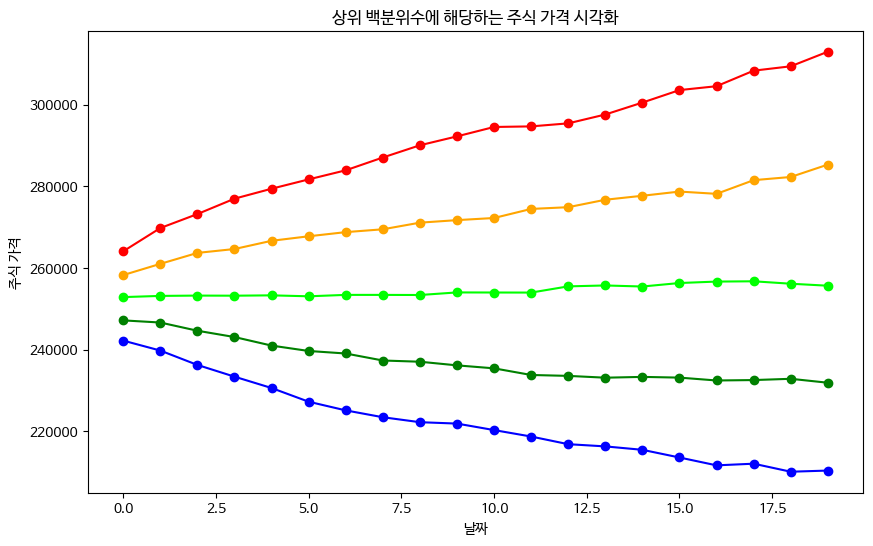

In [78]:
import matplotlib.pyplot as plt

# 데이터셋에서 상위 n0%에 해당하는 열
top_10_percentile = price_simulations_df.quantile(0.9, axis=1)
top_25_percentile = price_simulations_df.quantile(0.75, axis=1)
top_50_percentile = price_simulations_df.quantile(0.5, axis=1)
top_75_percentile = price_simulations_df.quantile(0.25, axis=1)
top_90_percentile = price_simulations_df.quantile(0.1, axis=1)

# 시각화
plt.figure(figsize=(10, 6))

plt.plot(top_10_percentile, color='red', label='상위 10%', marker='o')
plt.plot(top_25_percentile, color='orange', label='상위 25%', marker='o')
plt.plot(top_50_percentile, color='lime', label='상위 50%', marker='o')
plt.plot(top_75_percentile, color='green', label='상위 75%', marker='o')
plt.plot(top_90_percentile, color='blue', label='상위 90%', marker='o')

plt.title('상위 백분위수에 해당하는 주식 가격 시각화')
plt.xlabel('날짜')
plt.ylabel('주식 가격')
plt.show()

In [218]:
# 수익률 계산
returns = (price_simulations - initial_price) / initial_price

# 수익률을 정렬
sorted_returns = np.sort(returns)

# 특정 백분위수에 해당하는 수익률을 추출
percentiles = [90, 75, 50, 25, 10]  # 수익률을 추정
estimated_returns = np.percentile(sorted_returns, percentiles)*100

# 결과 출력
for p, return_value in zip(percentiles, estimated_returns):
    print(f"{p}% 예상 수익률: {return_value:.2f}%")


90% 예상 수익률: 15.23%
75% 예상 수익률: 7.25%
50% 예상 수익률: 0.55%
25% 예상 수익률: -5.49%
10% 예상 수익률: -12.13%


In [219]:
# 20일 예측의 종가가 특정 가격 이상인 경우 카운트
threshold = initial_price
count_above_threshold = np.sum(price_simulations[-1] >= threshold)

# 해당 확률 추정
probability_above_threshold = count_above_threshold / num_simulations

print(f"주식이 수익을 낼 확률: {probability_above_threshold:.2%}")

주식이 수익을 낼 확률: 53.90%


In [ ]:
np.sort(daily_returns)[1]

In [214]:
percentiles = [10, 25, 50, 75, 90]

# 각 백분위에 대한 통계값 계산
statistics = {
    '가중 수익률': ([np.sort(daily_returns)[10] for p in percentiles]),
    '월간 평균 수익률': ([daily_returns.mean() * num_days]),
    '연환산 변동성': ([daily_returns.std() * np.sqrt(num_days)]),
    '샤프 지수': ([(daily_returns.mean() * num_days - 0.035) / (daily_returns.std() * np.sqrt(num_days))]),
    '리스크' : daily_returns.std() * np.sqrt(num_days) }

# 통계값을 데이터프레임으로 정리
statistics_df = pd.DataFrame( statistics, index=[f'{p}%' for p in percentiles])

statistics_df.transpose()


,10%,25%,50%,75%,90%
가중 수익률,"[-0.10343265260667733, -0.09689417989698013, -...","[-0.10343265260667733, -0.09689417989698013, -...","[-0.10343265260667733, -0.09689417989698013, -...","[-0.10343265260667733, -0.09689417989698013, -...","[-0.10343265260667733, -0.09689417989698013, -..."
월간 평균 수익률,0 -0.050931 1 -0.156368 2 -0.01851...,0 -0.050931 1 -0.156368 2 -0.01851...,0 -0.050931 1 -0.156368 2 -0.01851...,0 -0.050931 1 -0.156368 2 -0.01851...,0 -0.050931 1 -0.156368 2 -0.01851...
연환산 변동성,0 0.131386 1 0.114586 2 0.15355...,0 0.131386 1 0.114586 2 0.15355...,0 0.131386 1 0.114586 2 0.15355...,0 0.131386 1 0.114586 2 0.15355...,0 0.131386 1 0.114586 2 0.15355...
샤프 지수,0 -0.654033 1 -1.670082 2 -0.34849...,0 -0.654033 1 -1.670082 2 -0.34849...,0 -0.654033 1 -1.670082 2 -0.34849...,0 -0.654033 1 -1.670082 2 -0.34849...,0 -0.654033 1 -1.670082 2 -0.34849...
리스크,NaN,NaN,NaN,NaN,NaN


In [221]:
# 백분위 수 설정
percentiles = [10, 25, 50, 75, 90]

# 연간 거래일 수 (20일을 1개월로 간주)
num_days = 20
num_months = len(price_simulations_df.columns) // num_days

# 가중 수익률 계산 (다른 방법으로 계산해야하는 경우 가중 평균을 사용합니다)
weighted_return = np.average(daily_returns, axis=0, weights=np.arange(1, num_days + 1))

# 연간 평균 수익률 계산
annual_mean_return = weighted_return * num_months

# 연환산 변동성 계산
annual_volatility = daily_returns.std() * np.sqrt(num_months)

# 샤프 지수 계산 (무위험 이자율은 0.035로 가정)
rf = 0.035
sharpe_ratio = (annual_mean_return - rf) / annual_volatility

# 리스크 계산
risk = annual_volatility

# 통계치를 데이터프레임으로 정리
statistics = {
    '가중 수익률': [weighted_return] * len(percentiles),
    '월간 평균 수익률': [annual_mean_return] * len(percentiles),
    '월환산 변동성': [annual_volatility] * len(percentiles),
    '샤프 지수': [sharpe_ratio] * len(percentiles),
    '리스크': [risk] * len(percentiles)
}

statistics_df = pd.DataFrame(statistics, index=[f'{p}th Percentile' for p in percentiles])

statistics_df.transpose()


,10th Percentile,25th Percentile,50th Percentile,75th Percentile,90th Percentile
가중 수익률,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
월간 평균 수익률,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
월환산 변동성,0 0.207739 1 0.181176 2 0.24278...,0 0.207739 1 0.181176 2 0.24278...,0 0.207739 1 0.181176 2 0.24278...,0 0.207739 1 0.181176 2 0.24278...,0 0.207739 1 0.181176 2 0.24278...
샤프 지수,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...
리스크,0 0.207739 1 0.181176 2 0.24278...,0 0.207739 1 0.181176 2 0.24278...,0 0.207739 1 0.181176 2 0.24278...,0 0.207739 1 0.181176 2 0.24278...,0 0.207739 1 0.181176 2 0.24278...
